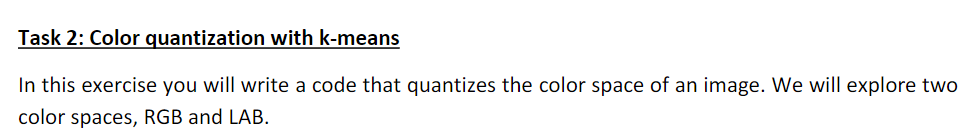

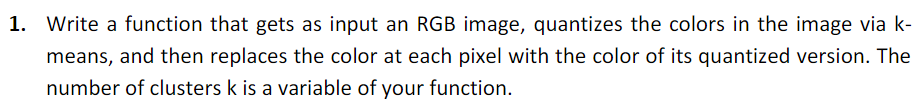

In [6]:
import os
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import imageio
from skimage import color, io


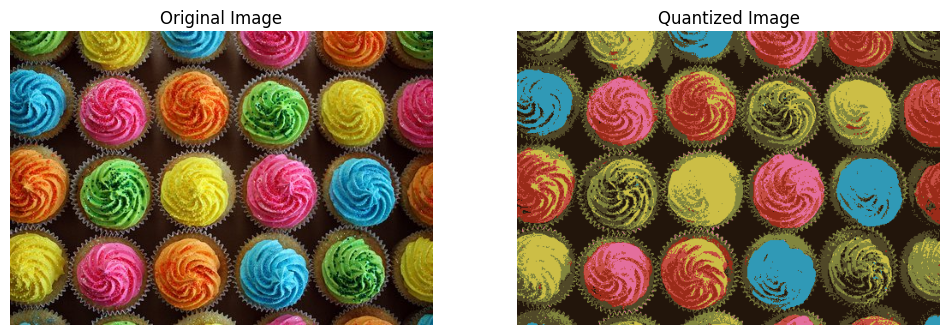

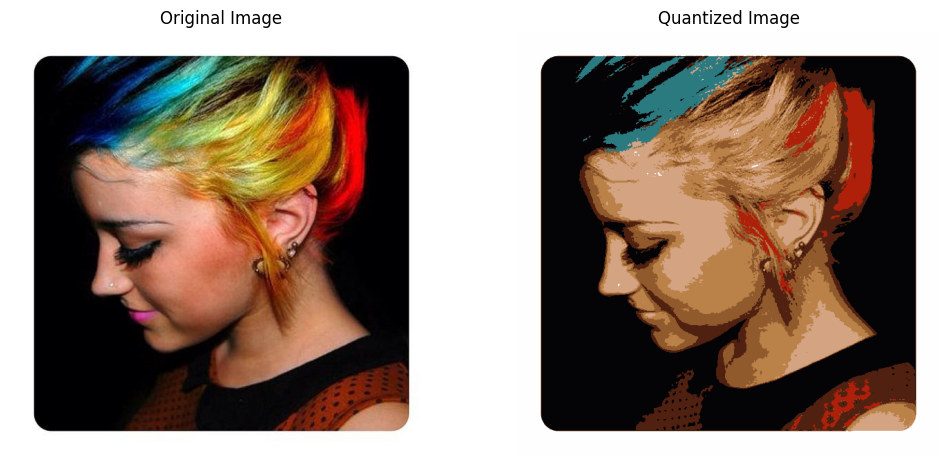

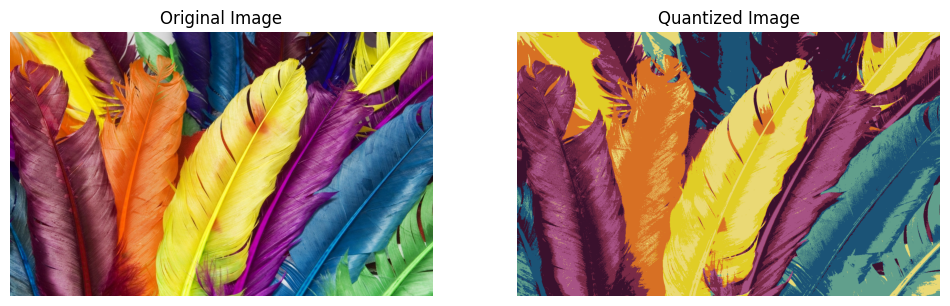

In [13]:
def quantize_image_kmeans(image, k):
    """
    Quantizes the colors in the input image using k-means clustering.

    Parameters:
    image (numpy.ndarray): Input RGB image.
    k (int): Number of clusters for k-means.

    Returns:
    numpy.ndarray: Quantized image.
    """
    # Reshape the image to a 2D array of pixels
    data = image.reshape((-1, 3))
    data = np.float32(data)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Replace each pixel value with its corresponding cluster center
    quantized_data = kmeans.cluster_centers_[kmeans.labels_]
    quantized_data = np.clip(quantized_data, 0, 255).astype(np.uint8)

    # Reshape the quantized data to the original image shape
    quantized_image = quantized_data.reshape(image.shape)

    return quantized_image

# Create output directory if it does not exist
output_dir = 'Task2-solution'
os.makedirs(output_dir, exist_ok=True)

imges = os.listdir('./Images/Task2')   
for img in imges:
    path = './Images/Task2/' + img
    # Read the image using plt.imread
    image = plt.imread(path)

    # Convert the image to uint8 if it's in float format
    if image.dtype == np.float32 or image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    
    # Number of clusters
    k = 8
    # Quantize the image
    quantized_image = quantize_image_kmeans(image, k)
     # Save the quantized image to the output directory using imageio
    save_path = os.path.join(output_dir, f'quantized_{img}')
    imageio.imwrite(save_path, quantized_image)
    
    # Plot the original and quantized images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot original image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    # Plot quantized image
    ax[1].imshow(quantized_image)
    ax[1].set_title('Quantized Image')
    ax[1].axis('off')
 
    # Show the plots
    plt.show()
    

    

    
    




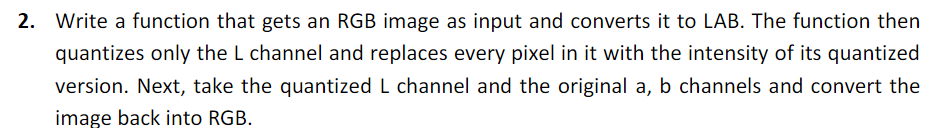

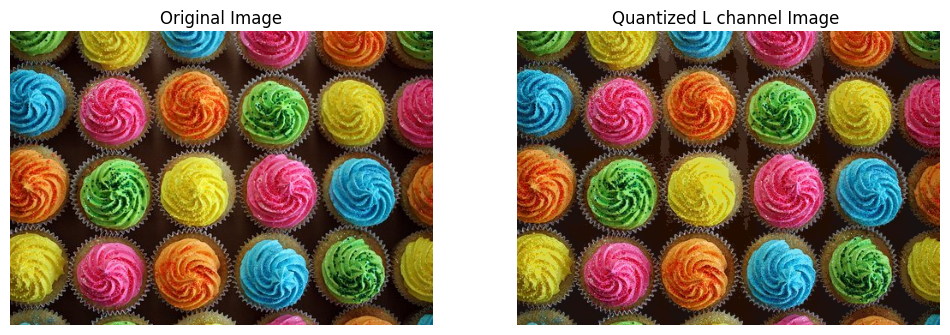

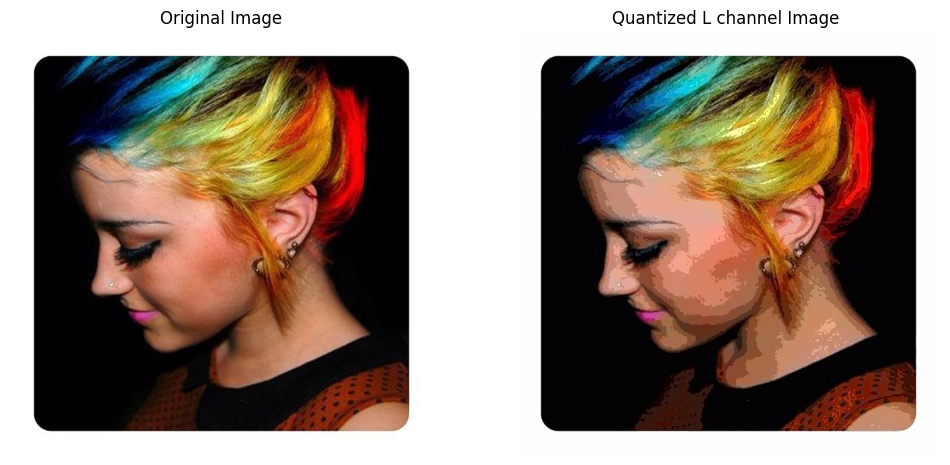

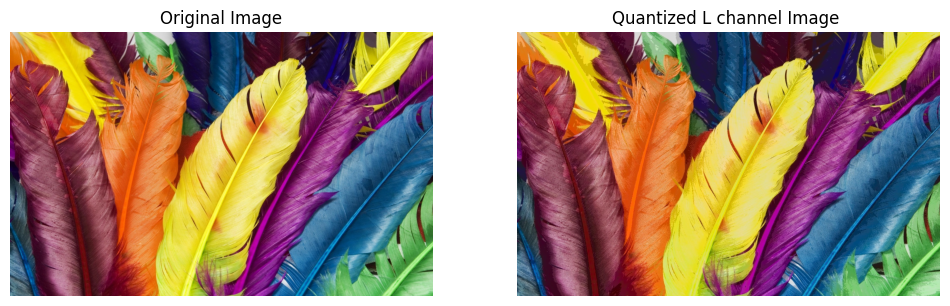

In [24]:
def quantize_l_channel(image, k):
    """
    Converts an RGB image to LAB, quantizes the L channel, and converts it back to RGB.

    Parameters:
    image (numpy.ndarray): Input RGB image.
    k (int): Number of clusters for k-means quantization.

    Returns:
    numpy.ndarray: RGB image with quantized L channel.
    """
    # Convert RGB to LAB
    lab_image = color.rgb2lab(image)

    # Extract L, a, b channels
    L = lab_image[:, :, 0]
    a = lab_image[:, :, 1]
    b = lab_image[:, :, 2]

    # Reshape the L channel to a 2D array of pixels
    L_reshaped = L.reshape(-1, 1)

    # Apply k-means clustering to the L channel
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(L_reshaped)

    # Replace each pixel value with its corresponding cluster center
    L_quantized = kmeans.cluster_centers_[kmeans.labels_].reshape(L.shape)

    # Combine the quantized L channel with the original a and b channels
    quantized_lab_image = np.stack((L_quantized, a, b), axis=2)

    # Convert LAB back to RGB
    quantized_rgb_image = color.lab2rgb(quantized_lab_image)

    # Convert the image from float [0, 1] to uint8 [0, 255]
    quantized_rgb_image = (quantized_rgb_image * 255).astype(np.uint8)

    return quantized_rgb_image


# Create output directory if it does not exist
output_dir2 = 'Task2-solut'
os.makedirs(output_dir2, exist_ok=True)
imges = os.listdir('./Images/Task2')   

for img in imges:
    # Read the image
    image_path = path = './Images/Task2/' + img
    image = io.imread(image_path)
    # Number of clusters
    k = 8
    quantized_image = quantize_l_channel(image, k)
    # Save the quantized image to the output directory using imageio
    save_path = os.path.join(output_dir2, f'quantized_{img}')
    imageio.imwrite(save_path, quantized_image)
    
    # Plot the original and quantized images side by side
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot original image
    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    
    # Plot quantized image
    ax[1].imshow(quantized_image)
    ax[1].set_title('Quantized L channel Image ')
    ax[1].axis('off')
    
    

    


    
